In [162]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 1: Read and Clean Data using Pandas

In [163]:
# Read the dataset

df_stroke = pd.read_csv("Resources/Stroke_prediction_Data.csv")
df_stroke.head()

 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [164]:
# Drop ID column
df_stroke.drop(columns=['id'], inplace=True)
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [165]:
# Get Dummies to transfrom column with encoding function

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

existing_categorical_cols = [col for col in categorical_cols if col in df_stroke.columns]

# Apply get_dummies 
df_stroke = pd.get_dummies(df_stroke, columns=existing_categorical_cols, drop_first=True)

# Fill missing values for numeric columns
numeric_cols = df_stroke.select_dtypes(include=['float64', 'int64']).columns
df_stroke[numeric_cols] = df_stroke[numeric_cols].fillna(df_stroke[numeric_cols].mean())

# Convert categorical columns into numerical using pd.get_dummies
df_stroke = pd.get_dummies(df_stroke, drop_first=True)


# Verify DataFrame after transformation
print("Transformed DataFrame:")
df_stroke.head()   

Transformed DataFrame:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


# Step 2: Analyze and Visualize Data using Matplotlib

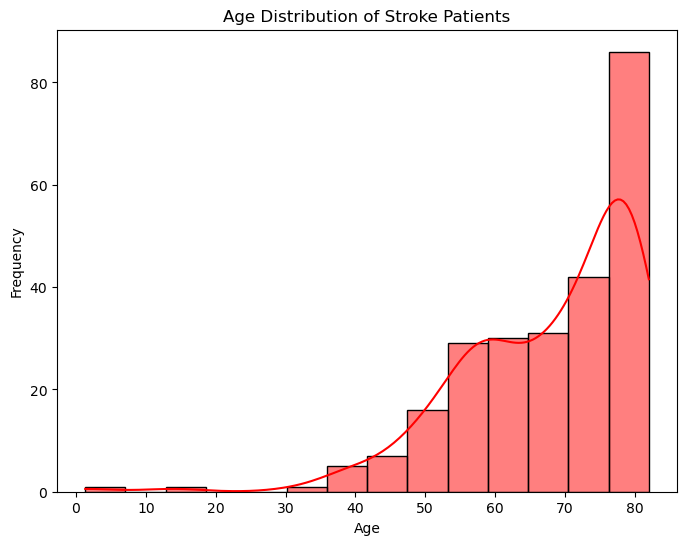

In [166]:
# Distribution of age for stroke patients
plt.figure(figsize=(8, 6))
sns.histplot(df_stroke[df_stroke['stroke'] == 1]['age'], kde=True, color='red')
plt.title("Age Distribution of Stroke Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\ayafa\AppData\Local\Temp\ipykernel_19180\2713491215.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='stroke', y='avg_glucose_level', data=df_stroke, ci=None)


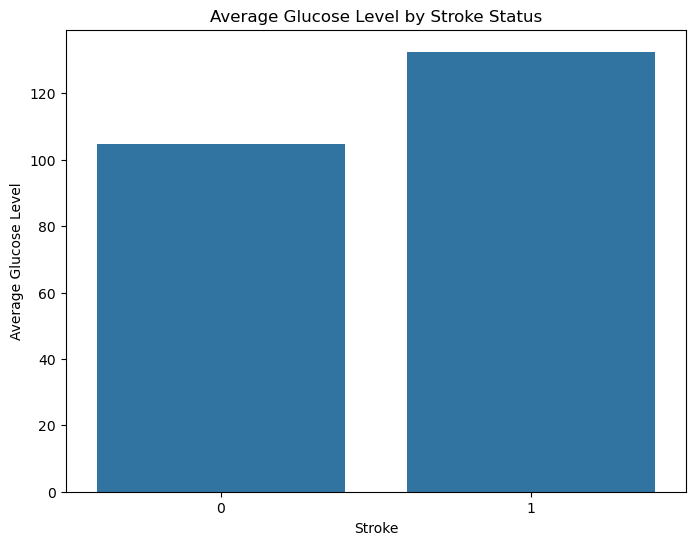

In [167]:
# Average glucose level for stroke vs non-stroke
plt.figure(figsize=(8, 6))
sns.barplot(x='stroke', y='avg_glucose_level', data=df_stroke, ci=None)
plt.title("Average Glucose Level by Stroke Status")
plt.xlabel("Stroke")
plt.ylabel("Average Glucose Level")
plt.show()

C:\Users\ayafa\AppData\Local\Temp\ipykernel_19180\3146668147.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='stroke', y='bmi', data=df_stroke, ci=None)


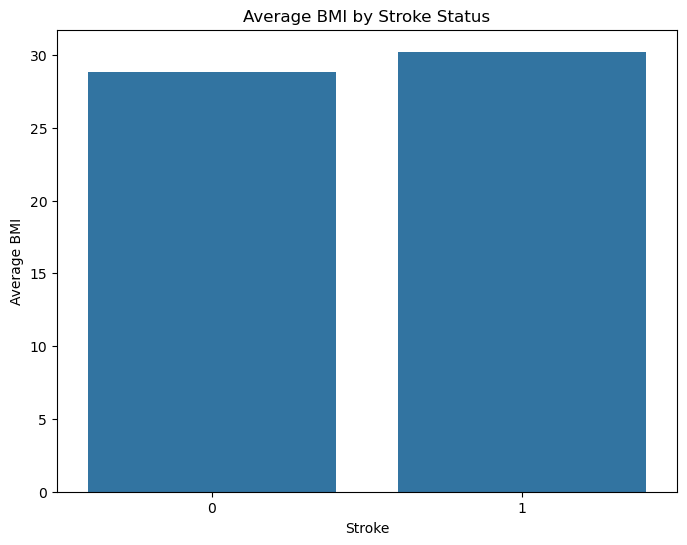

In [168]:
# Average BMI for stroke vs non-stroke
plt.figure(figsize=(8, 6))
sns.barplot(x='stroke', y='bmi', data=df_stroke, ci=None)
plt.title("Average BMI by Stroke Status")
plt.xlabel("Stroke")
plt.ylabel("Average BMI")
plt.show()

# Step 4: Build Machine Learning Model (Logistic Regression)

In [169]:
# Define the features (X) and target (y)
X = df_stroke.drop('stroke', axis=1)  # Features
y = df_stroke['stroke']  # Target

In [170]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)



In [171]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)




Model Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



C:\Users\ayafa\AppData\Local\Temp\ipykernel_19180\35472663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


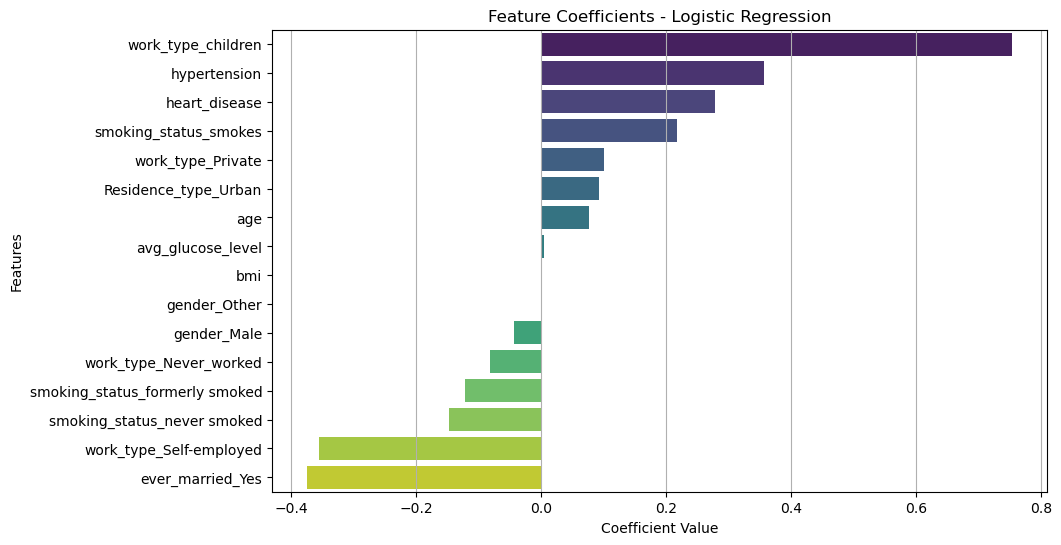

In [172]:
# Extract and prepare the coefficients for each feature
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot the Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x') 
plt.show()
